In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import numpy as np
import pandas as pd
import os,sys
#import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Research/RwithAlamin/parkinson/parkinson disease.csv")
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [9]:
df.rename(columns=({'MDVP:Fo(Hz)':'avg_fre', 'MDVP:Fhi(Hz)':'max_fre', 'MDVP:Flo(Hz)':'min_fre', 'MDVP:Jitter(%)':'var_fre1',
       'MDVP:Jitter(Abs)':'var_fre2', 'MDVP:RAP':'var_fre3', 'MDVP:PPQ':'var_fre4', 'Jitter:DDP':'var_fre5',
       'MDVP:Shimmer':'var_amp1', 'MDVP:Shimmer(dB)':'var_amp2', 'Shimmer:APQ3':'var_amp3', 'Shimmer:APQ5':'var_amp4',
       'MDVP:APQ':'var_amp5', 'Shimmer:DDA':'var_amp6'}),inplace=True)
df

,name,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [10]:
df.shape

(195, 24)

In [11]:
df.head(15)

,name,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [12]:
df.describe()

,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      195 non-null    object 
 1   avg_fre   195 non-null    float64
 2   max_fre   195 non-null    float64
 3   min_fre   195 non-null    float64
 4   var_fre1  195 non-null    float64
 5   var_fre2  195 non-null    float64
 6   var_fre3  195 non-null    float64
 7   var_fre4  195 non-null    float64
 8   var_fre5  195 non-null    float64
 9   var_amp1  195 non-null    float64
 10  var_amp2  195 non-null    float64
 11  var_amp3  195 non-null    float64
 12  var_amp4  195 non-null    float64
 13  var_amp5  195 non-null    float64
 14  var_amp6  195 non-null    float64
 15  NHR       195 non-null    float64
 16  HNR       195 non-null    float64
 17  status    195 non-null    int64  
 18  RPDE      195 non-null    float64
 19  DFA       195 non-null    float64
 20  spread1   195 non-null    float6

In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

name        0
avg_fre     0
max_fre     0
min_fre     0
var_fre1    0
var_fre2    0
var_fre3    0
var_fre4    0
var_fre5    0
var_amp1    0
var_amp2    0
var_amp3    0
var_amp4    0
var_amp5    0
var_amp6    0
NHR         0
HNR         0
status      0
RPDE        0
DFA         0
spread1     0
spread2     0
D2          0
PPE         0
dtype: int64

In [16]:
df.shape

(195, 24)

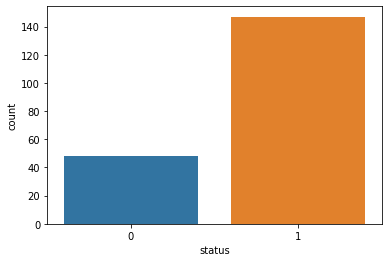

In [17]:
sns.countplot(df["status"])

In [18]:
st_counts=df.status.value_counts()
st_counts

1    147
0     48
Name: status, dtype: int64

In [19]:
x = df.drop(["name"],1)
x

,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [20]:
correlations = x.corr()

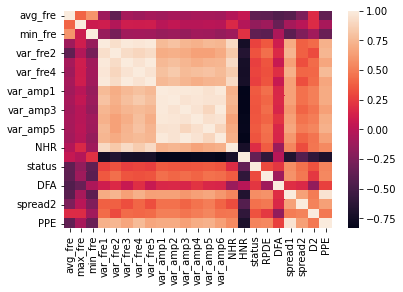

In [21]:
sns.heatmap(correlations)
plt.show()

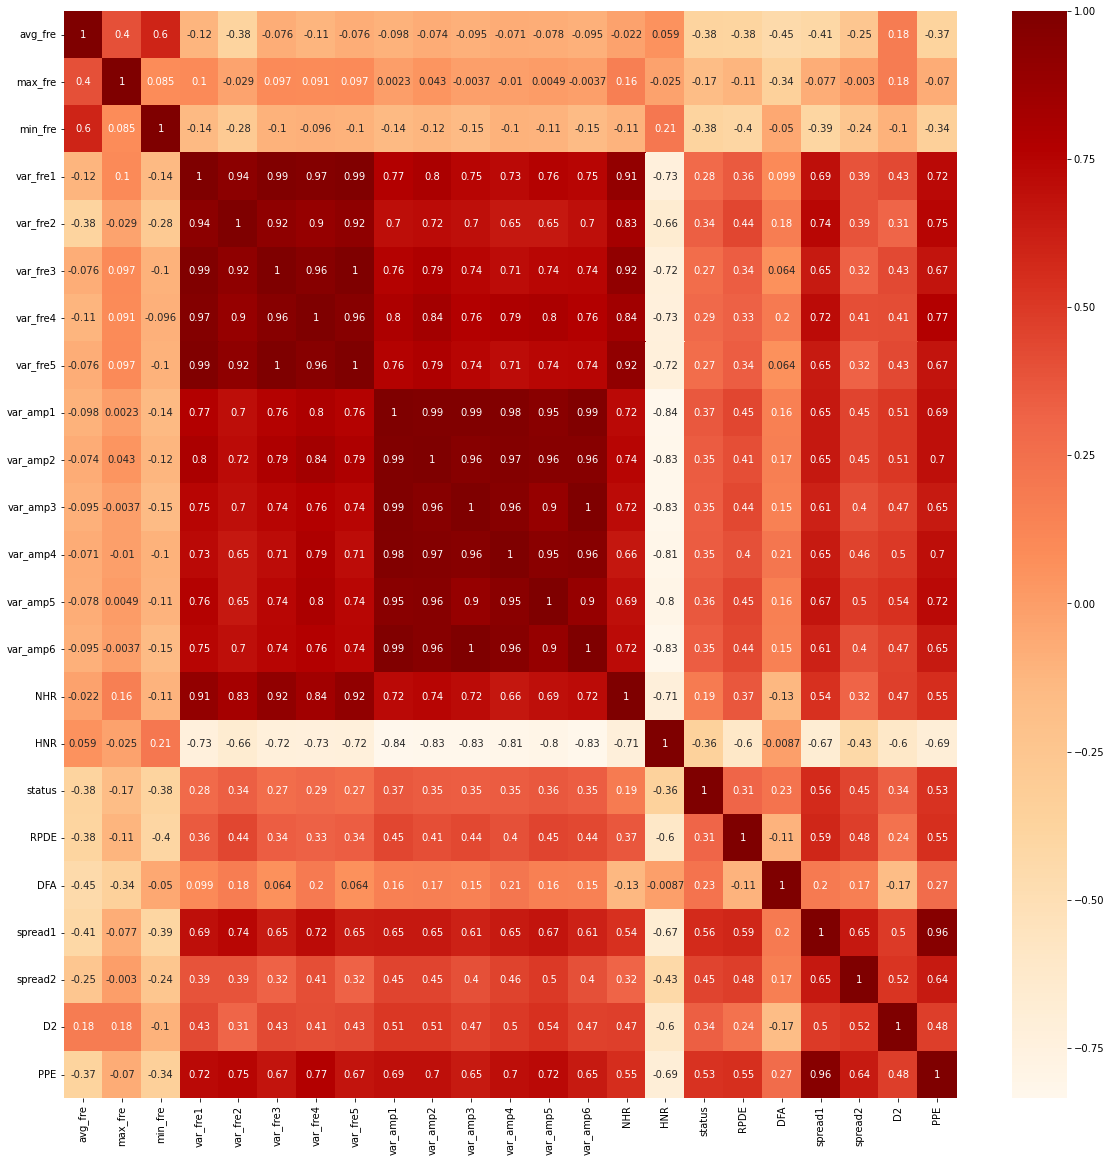

In [22]:
correl=x.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correl,annot=True,cmap='OrRd')
plt.show()

# Outlier detection

In [23]:
def detect_outliers(df, features):
    outlier_indices=[]
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3 - Q1
        #Outlier step
        outlier_step = IQR * 1.5
        #detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices) 
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    return multiple_outliers

In [24]:
x.loc[detect_outliers(x,["avg_fre","max_fre","min_fre","var_fre1","var_fre2","var_fre3","var_fre4","var_fre5","var_amp1","var_amp2","var_amp3","var_amp4","var_amp5","var_amp6","NHR","HNR","status","RPDE", "DFA", "spread1", "spread2", "D2", "PPE"])]

,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
102,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,0.930,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
149,202.632,565.740,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,0.833,...,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
98,125.791,140.557,96.206,0.01378,0.00011,0.00826,0.00655,0.02478,0.04689,0.422,...,0.07625,0.10323,15.433,1,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375
99,126.512,141.756,99.770,0.01936,0.00015,0.01159,0.00990,0.03476,0.06734,0.659,...,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483
100,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,0.891,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
101,128.451,150.449,75.632,0.01551,0.00012,0.00905,0.00909,0.02716,0.06170,0.584,...,0.09669,0.11843,15.060,1,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
146,169.774,191.759,151.451,0.01568,0.00009,0.00863,0.00946,0.02589,0.08143,0.821,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
147,183.520,216.814,161.340,0.01466,0.00008,0.00849,0.00819,0.02546,0.06050,0.618,...,0.08595,0.06057,14.367,1,0.478024,0.768974,-4.276605,0.355736,3.142364,0.336085
148,188.620,216.302,165.982,0.01719,0.00009,0.00996,0.01027,0.02987,0.07118,0.722,...,0.10422,0.08069,12.298,1,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646


In [25]:
# drop Outliers
x = x.drop(detect_outliers(x,["avg_fre","max_fre","min_fre","var_fre1","var_fre2","var_fre3","var_fre4","var_fre5","var_amp1","var_amp2","var_amp3","var_amp4","var_amp5","var_amp6","NHR","HNR","status","RPDE", "DFA", "spread1", "spread2", "D2", "PPE"]),axis=0).reset_index(drop=True)
x


,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,114.563,119.167,86.647,0.00327,0.00003,0.00146,0.00184,0.00439,0.01185,0.106,...,0.01672,0.00703,24.775,0,0.555303,0.659132,-6.710219,0.149694,1.913990,0.121777
174,201.774,262.707,78.228,0.00694,0.00003,0.00412,0.00396,0.01235,0.02574,0.255,...,0.04363,0.04441,19.368,0,0.508479,0.683761,-6.934474,0.159890,2.316346,0.112838
175,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
176,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895


In [26]:
corrl = x.corr()

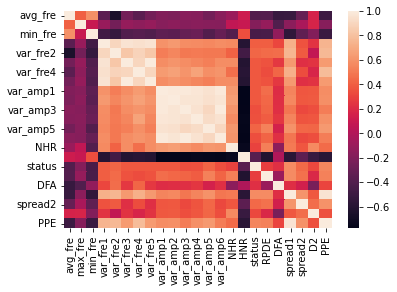

In [27]:
sns.heatmap(corrl)
plt.show()

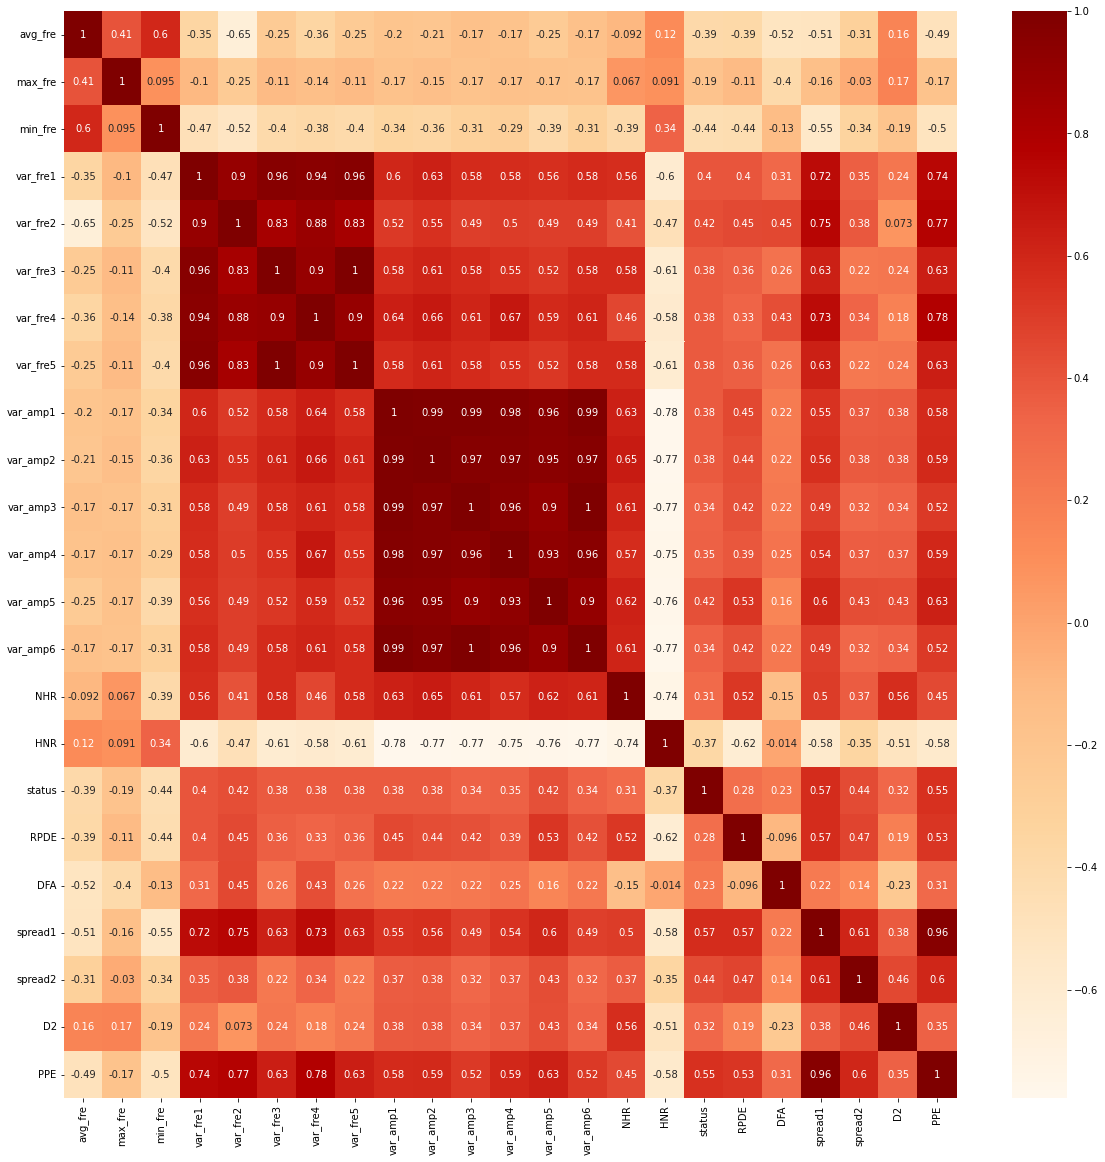

In [28]:
corre2=x.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corre2,annot=True,cmap='OrRd')
plt.show()

In [29]:
y=x["status"]
x = x.drop(["status"],1)
# y = df["Class"]

In [30]:
x.shape


(178, 22)

In [31]:
y.shape

(178,)

# Scaling

In [32]:
scalable=["avg_fre","max_fre","min_fre","var_fre1","var_fre2","var_fre3","var_fre4","var_fre5",
          "var_amp1","var_amp2","var_amp3","var_amp4","var_amp5","var_amp6","NHR","HNR",
          "RPDE", "DFA", "spread1", "spread2", "D2", "PPE"]


x[scalable]=StandardScaler().fit_transform(x[scalable])
x

,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,var_amp5,var_amp6,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.798178,-0.421646,-0.926217,1.243293,1.572084,0.858035,1.952625,0.855481,1.269467,1.389273,...,0.826802,1.022626,0.496646,-0.434995,-0.751355,1.747145,1.035642,0.567759,-0.104364,1.155401
1,-0.740966,-0.524121,-0.039436,2.072121,2.047340,1.605132,2.976579,1.602818,2.545377,2.914722,...,2.127327,2.251135,0.292859,-0.962021,-0.332325,1.823906,1.797060,1.418729,0.414360,2.238128
2,-0.876821,-0.731855,-0.091150,2.441490,2.522596,2.226403,3.589508,2.229532,1.892198,1.816399,...,1.403055,1.764116,-0.155183,-0.538344,-0.606037,1.928410,1.417313,1.118067,0.009828,1.773697
3,-0.876964,-0.651789,-0.095468,2.202752,2.522596,1.896107,2.991000,1.893886,2.079960,2.083352,...,1.572486,1.979471,-0.123386,-0.540238,-0.557245,1.818723,1.753399,1.400960,0.186907,2.242007
4,-0.892693,-0.605478,-0.111708,3.495543,3.473109,3.099327,4.505298,3.102735,2.756337,2.594378,...,2.217629,2.709785,0.175790,-0.809432,-0.726613,1.895720,2.134928,0.174105,-0.018369,2.774994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-0.927167,-0.873321,-0.660105,-0.815264,-0.328941,-0.903541,-0.715422,-0.901415,-1.042395,-1.051446,...,-0.919645,-1.072030,-0.593108,0.577391,0.599894,-1.082522,-0.922175,-0.870324,-1.188327,-0.943518
174,1.144900,0.826781,-0.852414,0.837888,-0.328941,1.188331,0.813297,1.185883,-0.035441,0.085014,...,-0.302431,0.084695,2.108152,-0.885456,0.149632,-0.636217,-1.153596,-0.744774,-0.062668,-1.058711
175,0.489478,0.450979,-0.486184,-0.220670,-0.328941,0.016568,-0.174602,0.018989,1.061407,1.229101,...,0.616409,1.221646,0.896271,-0.845145,-0.427717,-1.104865,-0.745057,-1.211928,0.891701,-0.798248
176,1.328844,0.712011,-0.595210,0.252303,-0.328941,0.551332,0.063359,0.553925,0.092875,0.146032,...,-0.189787,0.277697,0.206864,-0.945247,-0.588930,-0.645585,-0.390826,-1.121411,1.246546,-0.336331


In [33]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=.30,random_state=42)

In [36]:
xtest

,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,var_amp5,var_amp6,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
19,0.066967,-0.041498,0.623058,1.171221,0.621571,0.873764,0.834930,0.873837,0.994711,0.794348,...,2.073333,0.429004,1.330582,-1.484717,1.506218,-0.594194,1.302470,1.475199,1.448997,1.638092
45,2.120883,0.735901,2.566681,-1.274723,-1.326980,-1.131603,-1.039915,-1.134793,-0.818386,-0.837883,...,-0.995051,-0.698061,-0.757149,0.646922,-0.592670,-1.448641,-1.216903,-1.456587,0.075688,-1.189277
140,-0.819372,-0.763467,-0.610172,0.828879,1.096827,1.038911,0.121047,1.039038,0.042853,-0.059904,...,-0.060386,0.122522,2.231002,-0.220993,1.526662,-1.078879,1.627988,-0.550206,0.314413,0.676035
30,1.033279,0.165750,1.747650,-0.986435,-1.279454,-0.746258,-0.830797,-0.746703,-1.105466,-1.120091,...,-1.192411,-1.064722,-0.856152,1.118485,-0.679754,0.407668,-1.580647,-0.527303,-1.664274,-1.410114
67,-0.394818,-0.311437,-1.131637,1.869418,1.572084,1.935428,1.296430,1.933219,0.353857,0.489258,...,0.484215,0.321542,0.820393,-0.720152,0.050144,0.184778,0.507752,-0.181180,-0.132016,0.402738
16,-0.223300,1.851911,-0.748801,0.162213,0.146315,-0.392370,0.063359,-0.395324,-0.417489,-0.395503,...,-0.008253,-0.540736,0.242274,-0.083284,0.716027,-1.344191,0.388596,0.238764,-0.207713,0.298576
119,-0.366877,0.051360,-0.786491,0.162213,0.146315,0.260357,0.315742,0.262857,0.121873,0.016369,...,0.163971,0.122522,0.195302,-1.207407,1.252883,0.351094,0.285079,-1.640282,-1.447651,0.245883
174,1.144900,0.826781,-0.852414,0.837888,-0.328941,1.188331,0.813297,1.185883,-0.035441,0.085014,...,-0.302431,0.084695,2.108152,-0.885456,0.149632,-0.636217,-1.153596,-0.744774,-0.062668,-1.058711
109,0.110066,2.956941,-0.995863,-0.144093,-0.328941,-0.368777,-0.549571,-0.369101,-0.844484,-0.731101,...,-0.717631,-1.009272,0.021866,1.005126,-0.405032,-1.178727,-0.242129,0.651467,0.845042,-0.320725
141,-0.848596,-0.776412,-0.454365,0.626176,0.621571,0.747937,0.121047,0.745348,0.336458,0.245186,...,0.297096,0.348622,0.800158,-0.056771,1.301838,-1.211308,2.304236,-0.153425,0.282148,0.145123


# AdaBoosting Algorithm

In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
ab = AdaBoostClassifier(n_estimators=50)

In [39]:
ab.fit(xtrain,ytrain)

AdaBoostClassifier()

In [40]:
pred1 = ab.predict(xtest)

In [41]:
ab.score(xtest,ytest)

0.8888888888888888

In [42]:
from sklearn import metrics

Text(0.5, 257.44, 'Predicted label')

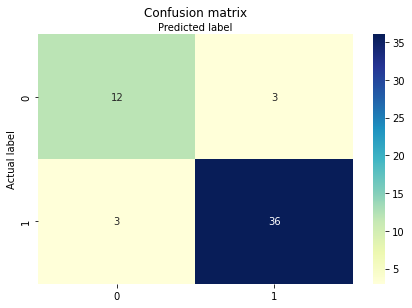

In [43]:
cnf_matrix = metrics.confusion_matrix(ytest, pred1)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
print("F1:",metrics.f1_score(ytest, pred1))
print("Accuracy:",metrics.accuracy_score(ytest, pred1))
print("Precision:",metrics.precision_score(ytest, pred1))
print("Recall:",metrics.recall_score(ytest, pred1))

F1: 0.9230769230769231
Accuracy: 0.8888888888888888
Precision: 0.9230769230769231
Recall: 0.9230769230769231


# SVM

In [45]:
from sklearn.svm import SVC

In [46]:
sv = SVC(probability=True)

In [47]:
sv.fit(xtrain,ytrain)

SVC(probability=True)

In [48]:
pred2 = sv.predict(xtest)
pred2

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [49]:
sv.score(xtest,ytest)

0.8333333333333334

In [50]:
print("F1:",metrics.f1_score(ytest, pred2))
print("Accuracy:",metrics.accuracy_score(ytest, pred2))
print("Precision:",metrics.precision_score(ytest, pred2))
print("Recall:",metrics.recall_score(ytest, pred2))

F1: 0.896551724137931
Accuracy: 0.8333333333333334
Precision: 0.8125
Recall: 1.0


# XGBoost

In [51]:
from xgboost import XGBClassifier

In [52]:
xg = XGBClassifier()

In [53]:
xg.fit(xtrain,ytrain)

XGBClassifier()

In [54]:
pred3 = xg.predict(xtest)

In [55]:
xg.score(xtest,ytest)

0.9444444444444444

Text(0.5, 257.44, 'Predicted label')

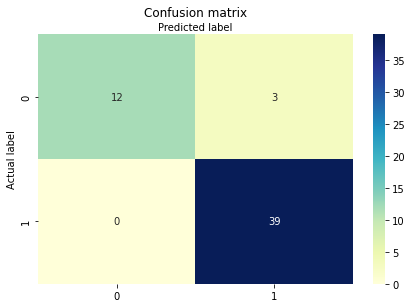

In [56]:
cnf_matrix = metrics.confusion_matrix(ytest, pred3)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [57]:
print("F1:",metrics.f1_score(ytest, pred3))
print("Accuracy:",metrics.accuracy_score(ytest, pred3))
print("Precision:",metrics.precision_score(ytest, pred3))
print("Recall:",metrics.recall_score(ytest, pred3))

F1: 0.962962962962963
Accuracy: 0.9444444444444444
Precision: 0.9285714285714286
Recall: 1.0


## LGMB

In [58]:
from lightgbm import LGBMClassifier

In [59]:
lgb = LGBMClassifier()

In [60]:
lgb.fit(xtrain,ytrain)

LGBMClassifier()

In [62]:
pred4 = lgb.predict(xtest)

In [63]:
lgb.score(xtest,ytest)

0.8148148148148148

In [64]:
print("F1:",metrics.f1_score(ytest, pred4))
print("Accuracy:",metrics.accuracy_score(ytest, pred4))
print("Precision:",metrics.precision_score(ytest, pred4))
print("Recall:",metrics.recall_score(ytest, pred4))

F1: 0.875
Accuracy: 0.8148148148148148
Precision: 0.8536585365853658
Recall: 0.8974358974358975


# LogisticRegression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lg = LogisticRegression()

In [67]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [69]:
pred5 =lg.predict(xtest)
pred5

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [70]:
lg.score(xtest,ytest)

0.8518518518518519

In [87]:
print("F1:",metrics.f1_score(ytest, pred5))
print("Accuracy:",metrics.accuracy_score(ytest, pred5))
print("Precision:",metrics.precision_score(ytest, pred5))
print("Recall:",metrics.recall_score(ytest, pred5))

F1: 0.9
Accuracy: 0.8518518518518519
Precision: 0.8780487804878049
Recall: 0.9230769230769231


# Naive Bayes Algorithm

In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
nb = GaussianNB()

In [73]:
nb.fit(xtrain,ytrain)

GaussianNB()

In [74]:
pred6 = nb.predict(xtest)

In [75]:
nb.score(xtest,ytest)

0.6851851851851852

In [88]:
print("F1:",metrics.f1_score(ytest, pred6))
print("Accuracy:",metrics.accuracy_score(ytest, pred6))
print("Precision:",metrics.precision_score(ytest, pred6))
print("Recall:",metrics.recall_score(ytest, pred6))

F1: 0.746268656716418
Accuracy: 0.6851851851851852
Precision: 0.8928571428571429
Recall: 0.6410256410256411


# K Nearest Neighbors Algorithm

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn = KNeighborsClassifier()

In [78]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [79]:
pred7 = knn.predict(xtest)

In [89]:
knn.score(xtest,ytest)

0.9074074074074074

In [90]:
print("F1:",metrics.f1_score(ytest, pred7))
print("Accuracy:",metrics.accuracy_score(ytest, pred7))
print("Precision:",metrics.precision_score(ytest, pred7))
print("Recall:",metrics.recall_score(ytest, pred7))

F1: 0.9397590361445783
Accuracy: 0.9074074074074074
Precision: 0.8863636363636364
Recall: 1.0


# Random Forest Algorithm

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf = RandomForestClassifier(n_estimators=100)

In [84]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [85]:
pred8 = rf.predict(xtest)

In [86]:
rf.score(xtest,ytest)

0.8703703703703703

In [91]:
print("F1:",metrics.f1_score(ytest, pred8))
print("Accuracy:",metrics.accuracy_score(ytest, pred8))
print("Precision:",metrics.precision_score(ytest, pred8))
print("Recall:",metrics.recall_score(ytest, pred8))

F1: 0.9135802469135802
Accuracy: 0.8703703703703703
Precision: 0.8809523809523809
Recall: 0.9487179487179487


# Decision Tree Algorithm

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
dtc = DecisionTreeClassifier()

In [94]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [95]:
pred9 = dtc.predict(xtest)

In [96]:
dtc.score(xtest,ytest)

0.8888888888888888

In [103]:
print("F1:",metrics.f1_score(ytest, pred9))
print("Accuracy:",metrics.accuracy_score(ytest, pred9))
print("Precision:",metrics.precision_score(ytest, pred9))
print("Recall:",metrics.recall_score(ytest, pred9))

F1: 0.9268292682926831
Accuracy: 0.8888888888888888
Precision: 0.8837209302325582
Recall: 0.9743589743589743


# Gradient Boosting Algorithm

In [97]:
from sklearn.ensemble import GradientBoostingRegressor

In [98]:
gb = GradientBoostingRegressor(n_estimators=100)

In [99]:
gb.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [100]:
pred10 = gb.predict(xtest)

In [101]:
gb.score(xtest,ytest)

0.5930333467184163